<a href="https://colab.research.google.com/github/hasnain003/Tensorflow2.0_Practice/blob/master/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [3]:
from __future__ import absolute_import, division, print_function

!pip install tensorflow-gpu==2.0.0-alpha0
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
from tensorflow import keras
import time

    100% |████████████████████████████████| 332.1MB 56kB/s 
    100% |████████████████████████████████| 61kB 23.4MB/s 
    100% |████████████████████████████████| 3.0MB 5.2MB/s 
    100% |████████████████████████████████| 419kB 11.4MB/s 


In [3]:
print("python", sys.version)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

python 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
matplotlib 3.0.3
numpy 1.14.6
pandas 0.22.0
sklearn 0.20.3
tensorflow 2.0.0-alpha0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [0]:
assert sys.version_info >= (3, 5) # Python ≥3.5 required
assert tf.__version__ >= "2.0"    # TensorFlow ≥2.0 required

In [0]:

classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

In [6]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_valid, y_valid = x_train_full[:5000], y_train_full[:5000]
x_train, y_train = x_train_full[5000:] , y_train_full[5000:]


170500096/170498071 [==============================] - 86s 1us/step


In [0]:
x_train = x_train/255
x_valid = x_valid/255
x_test = x_test/255

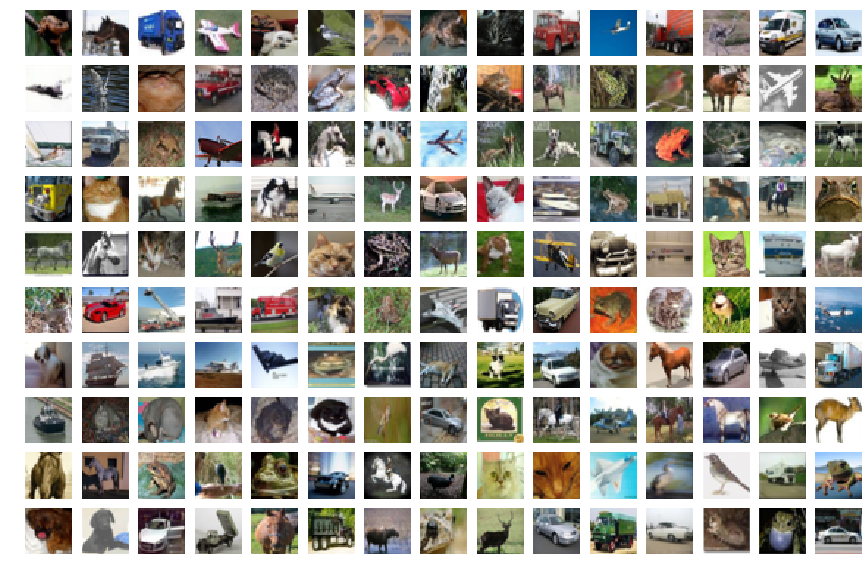

In [8]:
plt.figure(figsize=(15, 10))
n_rows, n_cols = 10, 15
for row in range(n_rows):
    for col in range(n_cols):
        i = row * n_cols + col
        plt.subplot(n_rows, n_cols, i + 1)
        plt.axis("off")
        plt.imshow(x_train[i])

In [9]:
#classes of the image in the first column
for i in range(n_cols):
    print(classes[y_train[i][0]], end=" ")

frog horse truck airplane dog bird cat cat cat truck airplane truck bird truck automobile 

Simple Baseline Model

In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3]),
    keras.layers.Dense(64,activation='selu'),
    keras.layers.Dense(64,activation='selu'),
    keras.layers.Dense(64,activation= 'selu'),
    keras.layers.Dense(10,activation='softmax')
])


model.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(lr=0.01), metrics=["accuracy"])

history = model.fit(x_train,y_train, epochs=20,
                   validation_data=(x_valid,y_valid))

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 8s 181us/sample - loss: 1.9094 - accuracy: 0.3110 - val_loss: 2.0571 - val_accuracy: 0.3020
Epoch 2/20
45000/45000 [==============================] - 7s 162us/sample - loss: 1.7244 - accuracy: 0.3824 - val_loss: 1.6830 - val_accuracy: 0.3998
Epoch 3/20
45000/45000 [==============================] - 7s 162us/sample - loss: 1.6442 - accuracy: 0.4138 - val_loss: 1.8063 - val_accuracy: 0.3514
Epoch 4/20
45000/45000 [==============================] - 7s 162us/sample - loss: 1.5924 - accuracy: 0.4318 - val_loss: 1.8118 - val_accuracy: 0.3626
Epoch 5/20
45000/45000 [==============================] - 7s 162us/sample - loss: 1.5551 - accuracy: 0.4465 - val_loss: 1.7517 - val_accuracy: 0.3722
Epoch 6/20
45000/45000 [==============================] - 7s 162us/sample - loss: 1.5234 - accuracy: 0.4557 - val_loss: 1.5698 - val_accuracy: 0.4322
Epoch 7/20
45000/45000 [===========================

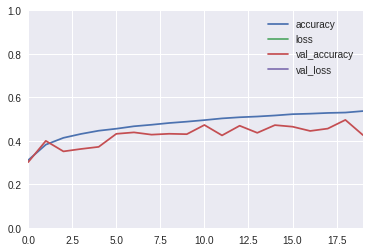

In [12]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 1])
plt.show()

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                196672    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 205,642
Trainable params: 205,642
Non-trainable params: 0
_________________________________________________________________


Convolutional Neural Network using a "classical" architecture: N * (Conv2D → Conv2D → Pool2D) → Flatten → Dense → Dense.

In [15]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.01), metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_valid, y_valid))

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 18s 396us/sample - loss: 1.9428 - accuracy: 0.3025 - val_loss: 1.8397 - val_accuracy: 0.3392
Epoch 2/20
45000/45000 [==============================] - 15s 339us/sample - loss: 1.5493 - accuracy: 0.4492 - val_loss: 1.7404 - val_accuracy: 0.3754
Epoch 3/20
45000/45000 [==============================] - 15s 339us/sample - loss: 1.3664 - accuracy: 0.5154 - val_loss: 1.3689 - val_accuracy: 0.5094
Epoch 4/20
45000/45000 [==============================] - 15s 336us/sample - loss: 1.2365 - accuracy: 0.5627 - val_loss: 1.3119 - val_accuracy: 0.5300
Epoch 5/20
45000/45000 [==============================] - 15s 327us/sample - loss: 1.1292 - accuracy: 0.5978 - val_loss: 1.1844 - val_accuracy: 0.5802
Epoch 6/20
45000/45000 [==============================] - 15s 323us/sample - loss: 1.0261 - accuracy: 0.6380 - val_loss: 1.1287 - val_accuracy: 0.5936
Epoch 7/20
45000/45000 [=====================

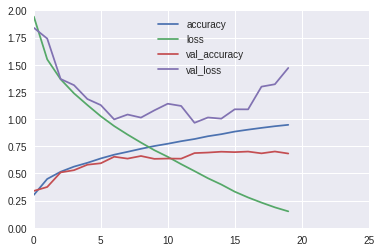

In [17]:
pd.DataFrame(history.history).plot()
plt.axis([0, 25, 0, 2])
plt.show()

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

As the obve graph suggest that model is completely overfitting.Let's add a batch normalization layer after each conv layer.And measure the performance

In [19]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
     keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
     keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
     keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
     keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.01), metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_valid, y_valid))

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 18s 399us/sample - loss: 1.3502 - accuracy: 0.5157 - val_loss: 1.2694 - val_accuracy: 0.5560
Epoch 2/20
45000/45000 [==============================] - 17s 377us/sample - loss: 0.9367 - accuracy: 0.6681 - val_loss: 0.9770 - val_accuracy: 0.6582
Epoch 3/20
45000/45000 [==============================] - 17s 374us/sample - loss: 0.7604 - accuracy: 0.7332 - val_loss: 0.8873 - val_accuracy: 0.6956
Epoch 4/20
45000/45000 [==============================] - 17s 375us/sample - loss: 0.6400 - accuracy: 0.7750 - val_loss: 0.8363 - val_accuracy: 0.7136
Epoch 5/20
45000/45000 [==============================] - 17s 376us/sample - loss: 0.5339 - accuracy: 0.8130 - val_loss: 1.0268 - val_accuracy: 0.6554
Epoch 6/20
45000/45000 [==============================] - 17s 377us/sample - loss: 0.4412 - accuracy: 0.8466 - val_loss: 0.8221 - val_accuracy: 0.7382
Epoch 7/20
45000/45000 [=====================

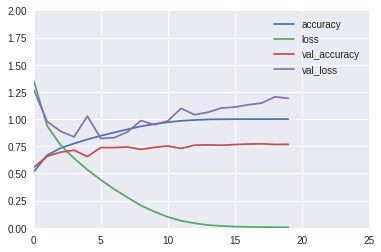

In [20]:
pd.DataFrame(history.history).plot()
plt.axis([0, 25, 0, 2])
plt.show()

It's overfitting again.It's look like our network have mimic the dataset that's how it got pretty high training accuraccy .

Seprable Convolution

In [22]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    keras.layers.BatchNormalization(),
    keras.layers.SeparableConv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.SeparableConv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.SeparableConv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.01), metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_valid, y_valid))

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 18s 390us/sample - loss: 1.3511 - accuracy: 0.5198 - val_loss: 1.1523 - val_accuracy: 0.5932
Epoch 2/20
45000/45000 [==============================] - 17s 373us/sample - loss: 0.9526 - accuracy: 0.6636 - val_loss: 0.9721 - val_accuracy: 0.6510
Epoch 3/20
45000/45000 [==============================] - 17s 373us/sample - loss: 0.7918 - accuracy: 0.7214 - val_loss: 0.9620 - val_accuracy: 0.6652
Epoch 4/20
45000/45000 [==============================] - 17s 373us/sample - loss: 0.6799 - accuracy: 0.7604 - val_loss: 0.9340 - val_accuracy: 0.6764
Epoch 5/20
45000/45000 [==============================] - 17s 374us/sample - loss: 0.5937 - accuracy: 0.7931 - val_loss: 0.8944 - val_accuracy: 0.7026
Epoch 6/20
45000/45000 [==============================] - 17s 372us/sample - loss: 0.5107 - accuracy: 0.8212 - val_loss: 0.8893 - val_accuracy: 0.7152
Epoch 7/20
45000/45000 [=====================

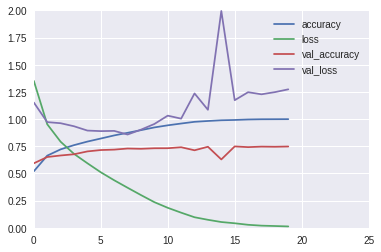

In [23]:
pd.DataFrame(history.history).plot()
plt.axis([0, 25, 0, 2])
plt.show()

In [24]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_v2_8 (Ba (None, 32, 32, 32)        128       
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 32, 32, 32)        1344      
_________________________________________________________________
batch_normalization_v2_9 (Ba (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
separable_conv2d_4 (Separabl (None, 16, 16, 64)        2400      
_________________________________________________________________
batch_normalization_v2_10 (B (None, 16, 16, 64)       

Let's train the data on Pretrained CNN

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
drive_path = '/content/gdrive/My Drive/Colab/Tensorflow 2.0/CNN/images/'
img_fig_path = os.path.join(drive_path, "fig.jpg")
img_fig = keras.preprocessing.image.load_img(img_fig_path, target_size=(299, 299))
img_fig = keras.preprocessing.image.img_to_array(img_fig)

FileNotFoundError: ignored